In [ ]:
# Trading using BSM model. This model mainly use for european options. 

In [ ]:
# To determine the price of option we need 5 inputs:
# Strike Price, Underline asset price, volatility, Interest rates, & TTM(Time to Maturity), By getting those values one may calculate how much one should pay in option premium

In [7]:
pip install qfin

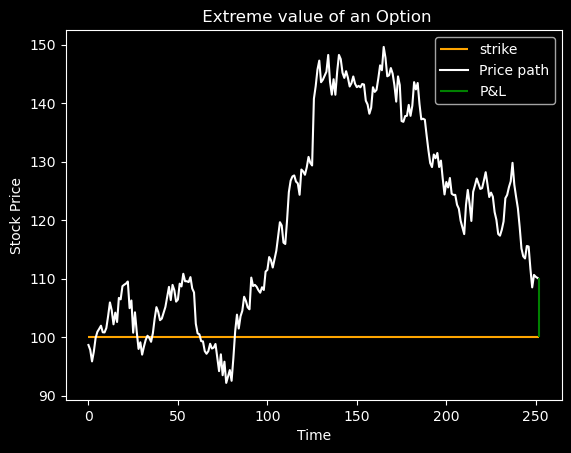

 Premium at t=0: 14.231254785985819
P&L: -4.125039250588323


In [8]:
import numpy as np
from scipy.stats import norm

def black_scholes_call(S, K, sigma, r, t):
     d1 = (np.log(S/K) + (r +((sigma**2)/2))*t) / (sigma * np.sqrt(t))
     d2 = d1 - (sigma * np.sqrt(t))
     C = S * norm.cdf(d1) - K * np.exp(-r*t) * norm.cdf(d2)
     return C 

black_scholes_call(100, 100, .3, .05, 1)

# Make or lose money in trading ??? Uncertain right ??? But we may get idea about the winning possibilities. 

import matplotlib.pyplot as plt
import qfin as qf

# simulate dynamics acc to geometric brownian motion

path = qf.simulations.GeometricBrownianMotion(100, 0.05, .3, 1/252, 1)

# Create chart for price path and strike price

plt.title (" Extreme value of an Option")
plt.hlines(100, 0, 252, label = 'strike', color = 'orange')
plt.plot( path.simulated_path, label = 'Price path', color = 'white')
if max(path.simulated_path[-1] - 100, 0) == 0:
    plt.vlines(252, path.simulated_path[-1], 100, color='red', label= "P&L")
else:
    plt.vlines(252, 100, path.simulated_path[-1], color='green', label= "P&L")
plt.style.use('dark_background')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

#print the premium and resultant P&L
print (" Premium at t=0:", black_scholes_call(100, 100, .3, .05, 1))
print ("P&L:", max(path.simulated_path[-1] - 100, 0) - black_scholes_call(100, 100, .3, .05, 1))

In [ ]:
# Interesting right. If we run above code for multiple time it will give multiple paths to us. The vertical green or red line shows the possibility of making profit or loss
# But they are possibilities and one can get idea that the trade may incurred loss or profit (Nobody knows). We are drawing possibilities based on calculations
# The model only gives us possibilities of future happenings, But in real how market will perform nobody knows. 
# But it is good to have an model which at least predict/provide possible circumstances so one can take possible actions. 

In [ ]:
# How to make money using BSM
# What we do here? We are checking how market is quoting and based on that how much trade edge we have to win the possibility
# In simple terms, The trade edge is 0.0812 (8.12%). If we trade at large quantities (1k, 10k, 100k), there is possibility of making average money. (Assuming Qty trades may work here)
# 1st line is for our call price, 2nd is market quote and for trade edge we simply minus the market quote from call price. 

In [9]:
print(" Call Price:", black_scholes_call(100, 100, .3, .05, 1))
print("Market Maker Quote:", "13.45 @ 14.10")
print("Trade Edge:", black_scholes_call(100, 100, .3, .05, 1) - 14.15)

 Call Price: 14.231254785985819
Market Maker Quote: 13.45 @ 14.10
Trade Edge: 0.08125478598581815


In [ ]:
#Computing P/L Edge wrt to model dynamic, High level taking idea of incurring losses or profits. 

In [10]:
premium = 14.15 * 100
pls = []

for i in range(100000):
    path = qf.simulations.GeometricBrownianMotion(100, 0.05, .3, 1/252, 1)
    pls.append(max(path.simulated_path[-1] - 100, 0)*100 - premium)

np.mean(pls)

np.float64(86.9963997355627)

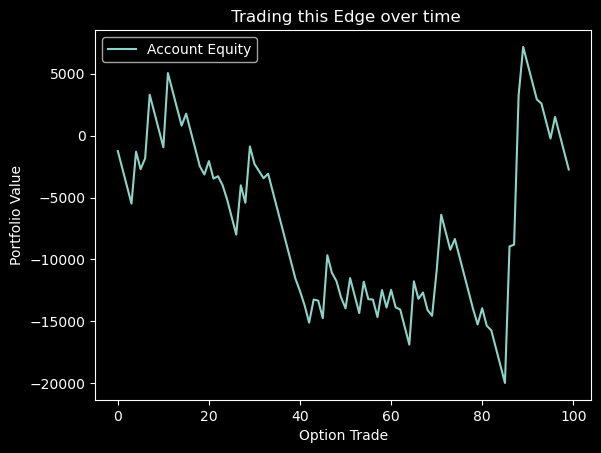

In [11]:
# Simulating the P&L Edge wrt to model dynamics
premium = 14.15 * 100
pls = []

for i in range (100):
    path = qf.simulations.GeometricBrownianMotion(100, 0.05, .3, 1/252, 1)
    pls.append(max(path.simulated_path[-1] - 100, 0)*100 - premium)

plt.title(" Trading this Edge over time")
plt.plot(np.cumsum(pls), label="Account Equity")
plt.style.use('dark_background')
plt.xlabel('Option Trade')
plt.ylabel('Portfolio Value')
plt.legend()
plt.show()

In [ ]:
# From this model, One may start to built this into new level. There will be more greeks to be consider while developing the model. 

In [ ]:
# Key assumptions

In [ ]:
# Risk free rate is constant # No arbitrage, No Transaction costs, No taxes

In [ ]:
# Continuos trading and perfect markets

In [ ]:
# Option is european only